<a href="https://colab.research.google.com/github/Utkarsh-STUD/utkarsh-stud.github.io/blob/main/Exploratory_Data_Analysis_US_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**US Accidents Exploratory Data Analysis**




In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
download_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: utkarshpandita
Your Kaggle Key: ··········


100%|██████████| 290M/290M [00:03<00:00, 87.6MB/s]


In [8]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'

##**Data Preparation and Cleaning**

Load the data in using pandas

Look at the information about pandas

Find and fix all the missing values

In [5]:
import pandas as pd
from matplotlib import pyplot as plt 
from matplotlib import style
import seaborn as sns

In [9]:
df = pd.read_csv(data_filename)

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           8 non-null      float64
 1   Start_Lat          8 non-null      float64
 2   Start_Lng          8 non-null      float64
 3   End_Lat            8 non-null      float64
 4   End_Lng            8 non-null      float64
 5   Distance(mi)       8 non-null      float64
 6   Number             8 non-null      float64
 7   Temperature(F)     8 non-null      float64
 8   Wind_Chill(F)      8 non-null      float64
 9   Humidity(%)        8 non-null      float64
 10  Pressure(in)       8 non-null      float64
 11  Visibility(mi)     8 non-null      float64
 12  Wind_Speed(mph)    8 non-null      float64
 13  Precipitation(in)  8 non-null      float64
dtypes: float64(14)
memory usage: 960.0+ bytes


In [ ]:
df.isnull().sum().sort_values(ascending = False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [ ]:
 missing_percent = df.isnull().sum().sort_values(ascending = False) / len(df)
 missing_percent = missing_percent[missing_percent!= 0]*100
 missing_percent

Number                   65.081728
Precipitation(in)        44.771263
Wind_Chill(F)            40.729888
Wind_Speed(mph)          10.567740
End_Lat                   9.730270
End_Lng                   9.730270
Visibility(mi)            2.479796
Weather_Condition         2.471986
Humidity(%)               2.451997
Temperature(F)            2.312797
Wind_Direction            2.183781
Pressure(in)              1.957882
Weather_Timestamp         1.614148
Airport_Code              0.227344
Timezone                  0.118007
Zipcode                   0.038326
Nautical_Twilight         0.003784
Astronomical_Twilight     0.003784
Civil_Twilight            0.003784
Sunrise_Sunset            0.003784
City                      0.003716
dtype: float64

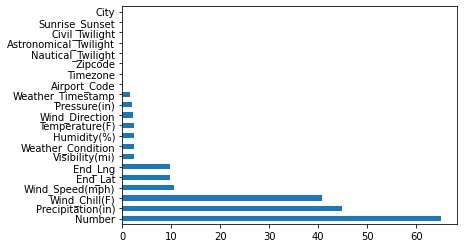

In [ ]:
missing_percent.plot(kind = 'barh')

You can drop the coulmns which have missing values of the time cause they wont matter that much and filling them would produce wrong results

##**Exploratory Data analysis and Visualization**

Coulmns we'll analyze 

1. City
2. Start Lat, Start Lng
3. Start Time
4. Wheather Condition

In [ ]:

df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### City

In [22]:
cities = df.City.unique()
len(cities)

11790

In [23]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Los Angeles            68411
Houston                68265
Charlotte              56176
Miami                  49965
Dallas                 48525
                       ...  
Keytesville                1
Larchwood                  1
Speonk                     1
West Columbia-Cayce        1
Wagoner                    1
Name: City, Length: 11789, dtype: int64

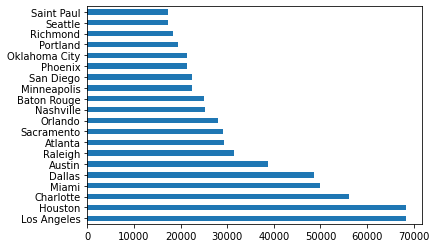

In [ ]:
cities_by_accident[:20].plot(kind = 'barh')

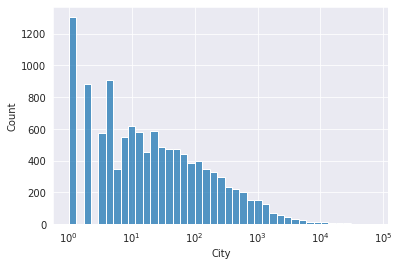

In [ ]:
sns.set_style('darkgrid')
sns.histplot(cities_by_accident, log_scale = True)

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]


In [ ]:
len(high_accident_cities) / len(cities)

0.04351145038167939

In [26]:
cities_by_accident[cities_by_accident ==1]

Rock Creek             1
Scotland               1
Middlebrook            1
Heart Butte            1
Loch Sheldrake         1
                      ..
Keytesville            1
Larchwood              1
Speonk                 1
West Columbia-Cayce    1
Wagoner                1
Name: City, Length: 1306, dtype: int64

In [28]:
len(cities_by_accident[cities_by_accident ==1]) / len(cities) *100

11.077184054283292

In [10]:
df.City[df.City == "New York"].value_counts() 

New York    7328
Name: City, dtype: int64

In [ ]:
cities_by_accident[:100]

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
                   ...  
Sarasota            4336
Pensacola           4287
West Palm Beach     4224
Hollywood           4175
Baltimore           4175
Name: City, Length: 100, dtype: int64

In [ ]:
df.State.value_counts()

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
PA     89745
VA     89730
MN     79712
IL     77626
GA     69536
MI     67073
AZ     61707
TN     55495
MD     52755
NJ     50214
LA     50103
WA     49455
OH     47836
UT     46897
CO     37280
OK     35105
AL     33290
MO     28674
MA     25121
IN     24993
CT     24054
KY     15296
WI     14669
NE     13678
IA      9492
RI      8314
NV      7812
KS      7444
NH      6250
MS      5419
DC      5201
AR      4726
DE      4625
ID      4165
NM      3973
WV      3421
MT      3333
ME      2266
VT       555
ND       463
WY       419
SD       217
Name: State, dtype: int64

### Start Time

In [16]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


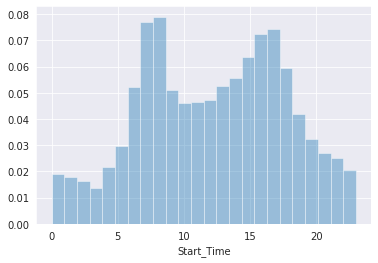

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)

High percentage of accidents happen between 6 - 10 am and 3 - 6 pm

Accidents per week

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


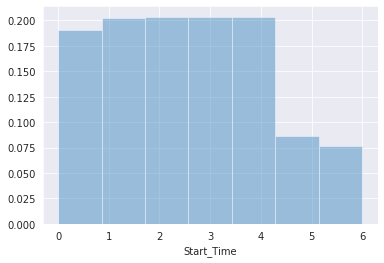

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)

Is the distribution by hour the same on weekends like weekdays

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


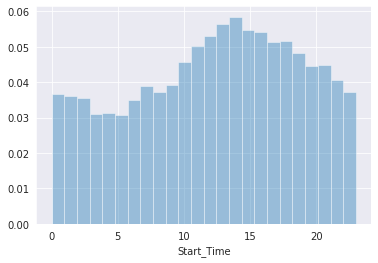

In [ ]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6 ]
sns.distplot(sunday_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


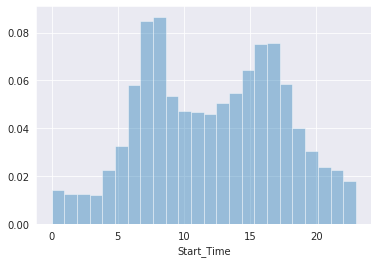

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0 ]
sns.distplot(monday_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)


On Sundays more accidents happen in afternoon

Accidents per month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


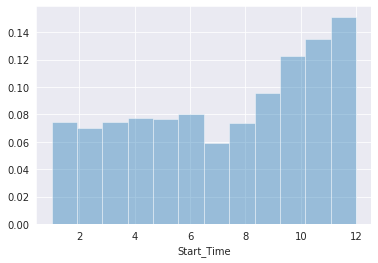

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


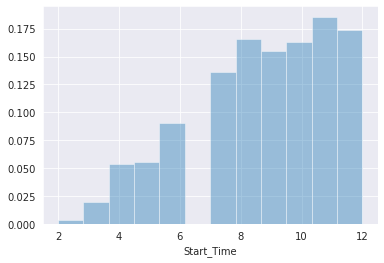

In [ ]:
df2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df2016.Start_Time.dt.month, bins = 12 , kde = False , norm_hist = True)

A lot of data is missing for 2016

### Start Latitude and Start Longitude

In [ ]:
df.Start_Lat , df.Start_Lng

(0          34.808868
 1          35.090080
 2          37.145730
 3          39.110390
 4          26.102942
              ...    
 2906605    29.813824
 2906606    34.068890
 2906607    25.702200
 2906608    40.660140
 2906609    38.831749
 Name: Start_Lat, Length: 2906610, dtype: float64, 0          -82.269157
 1          -80.745560
 2         -121.985052
 3         -119.773781
 4          -80.265091
               ...    
 2906605    -95.399437
 2906606   -117.342010
 2906607    -80.335556
 2906608   -111.952460
 2906609   -104.748161
 Name: Start_Lng, Length: 2906610, dtype: float64)

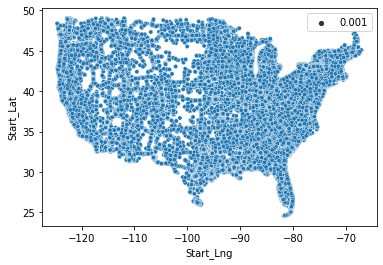

In [ ]:
sns.scatterplot(x = df.Start_Lng , y = df.Start_Lat, size = 0.001)

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))

[(34.808868, -82.26915699999998),
 (35.09008, -80.74556),
 (37.14573, -121.985052),
 (39.11039, -119.773781),
 (26.102942, -80.265091),
 (35.34824000000001, -80.84722099999998),
 (39.52397, -107.777),
 (34.034017, -118.026972),
 (35.86349000000001, -86.83168),
 (34.42633, -118.5851),
 (28.021709, -82.203583),
 (40.91221, -73.875099),
 (32.86693, -96.66617),
 (32.265141, -110.90358700000002),
 (41.05982, -74.25092),
 (29.723339000000006, -95.497337),
 (34.103172, -118.249969),
 (34.186595000000004, -117.439427),
 (42.501929, -82.918056),
 (41.556862, -73.779556),
 (33.918056, -84.33802800000002),
 (35.596561, -78.759743),
 (29.640491, -95.482445),
 (37.40691, -79.913933),
 (40.9122, -73.88461),
 (37.994461, -122.069885),
 (32.87109, -80.010628),
 (30.426109000000004, -97.753906),
 (33.774159000000004, -118.049783),
 (43.22039, -85.500961),
 (25.684458, -80.445924),
 (43.003693, -78.412064),
 (39.922646, -86.11689),
 (30.420996, -91.140549),
 (35.23932999999999, -80.856415),
 (35.05473, 

In [ ]:
sampledf = df.sample(int(0.01 * len(df)))
map = folium.Map()
HeatMap(list(zip(list(sampledf.Start_Lat), list(sampledf.Start_Lng)))).add_to(map)
map

###Severity

In [ ]:
x = df.Severity.value_counts() / len(df.Severity) * 100
x

2    73.255889
3    21.655881
4     4.099071
1     0.989159
Name: Severity, dtype: float64

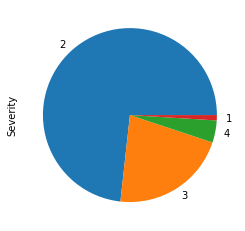

In [ ]:
x.plot(kind = "pie")

In [ ]:
df.loc[:, ["State", "Severity", "Traffic_Calming"]]


,State,Severity,Traffic_Calming
0,SC,2,False
1,NC,2,False
2,CA,2,False
3,NV,2,False
4,FL,3,False
...,...,...,...
2906605,TX,2,False
2906606,CA,2,False
2906607,FL,2,False
2906608,UT,2,False


##**Question & Answers**

####Q1. Why new york doesnt show up in top 20 cities by accident despite being the most populated city?

In [11]:
df.City[df.City == "New York"].value_counts() 

New York    7328
Name: City, dtype: int64

New York despite being the most populated city only reports 7328 accidents from 2016 - 2020
This could be because a lot of data is missing from 2016 and 2017

####Q2. Which States are most prone to accidents?

In [14]:
df.State.value_counts()[:7]

CA    730744
FL    263300
TX    226640
NY    126176
NC    122797
SC    120462
OR     98352
Name: State, dtype: int64

Only 6 states out of 49 have reported more than 1 lakh accidents in 4 years

####Q3. When does the most of the accidents happen during a day?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


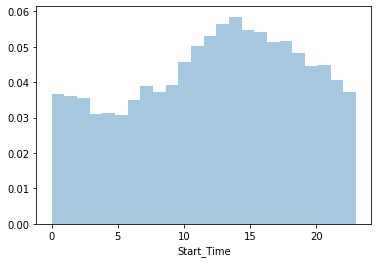

In [17]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6 ]
sns.distplot(sunday_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)

On weekends more accidents happen during afternoon

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


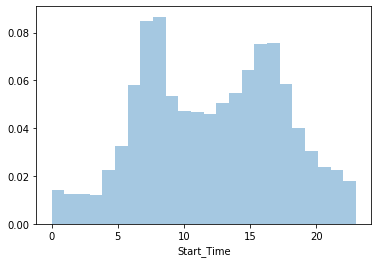

In [18]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0 ]
sns.distplot(monday_start_time.dt.hour, bins = 24, kde = False, norm_hist = True)


On mondays and other working days more accidents happen during 6-9am and 5-7pm
(Probably because people are rushing to go to work and in the second half rushing to come home)

####Q4. What is the trend of accidents as per week?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


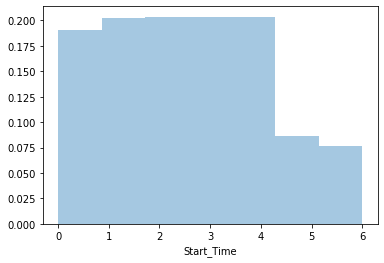

In [32]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)

Accidents are more likely to happen during work days

####Q5. What is the trend of the accident in a year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


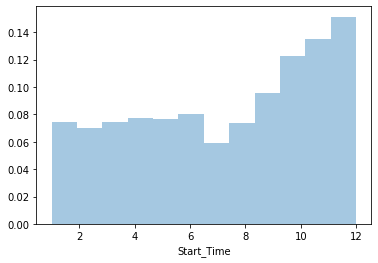

In [33]:
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True)

More accidents are likely to happen in winter (Probably  because the ice makes the road slippery)

####Q6. What is the severity trend ?

In [31]:
x = df.Severity.value_counts() / len(df.Severity) * 100
x

2    73.255889
3    21.655881
4     4.099071
1     0.989159
Name: Severity, dtype: float64

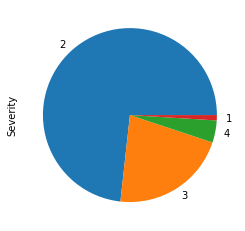

In [20]:
x.plot(kind = "pie")

Accidents with 2nd Degree severity are 73.255889 %

Accidents with 3nd Degree severity are 21.655881

Accidents with 4nd Degree severity are 4.099071%

Accidents with 1st Degree severity are 0.989159 %

####Q7. How many cities only report 1 accident?

In [30]:
len(cities_by_accident[cities_by_accident ==1]) / len(cities) * 100

11.077184054283292

11% of the cities reported only 1 accident

####Q8. What is distribution of accidents on a map?

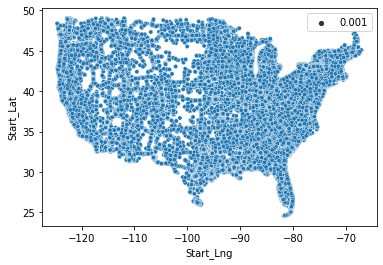

In [34]:
sns.scatterplot(x = df.Start_Lng , y = df.Start_Lat, size = 0.001)

As we can see from the above scatterplot area around the edges is thicker than the area in middle 

##**Summary and Insights**

1. Despite being the most populated city, Only 0.2% of all the accidents occur in New York (Can be due to a lot of missing data)
2. Only 4.3% of cities have more than 1000 accidents per year
3. About 1300 cities i.e 11% of the cities have reported 1 accident yearly
4. The no. of accidents decreases exponentially
5. Lots of data is missing from 2016
6. 6 States have reported more than 1 lakh accidents
7. Accidents with 2nd Degree severity are  73.255889 %
 
 Accidents with 3nd Degree severity are  21.655881
 
 Accidents with 4nd Degree severity are  4.099071%

Accidents with 1st Degree severity are   0.989159 %

##**Future Approach**

There is a lot of things we can still do with the dataset. Since we cannot analyze 3 million records in one go so we will leave some pointers which can help in future approach with this dataset

1. We can find out the what is the relationship between severity and traffic claming 

2. We can find out the relationship between accidents happening and visibilty in that area

3. We can find out the relationship between accidents happening and traffic signal in that area

These are just few there can be plethora of new elements which can be analysed 

**I would like to thank UTKARSH PANDITA**